In [53]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
import random

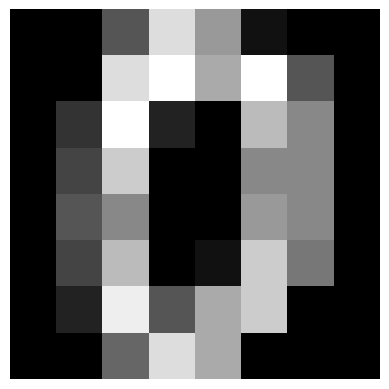

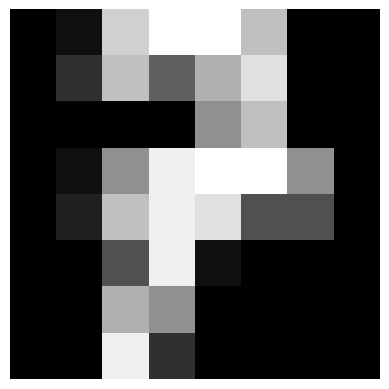

In [2]:
class MnistDataset(torch.utils.data.Dataset):
    def __init__(self, data,targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        slice_i = torch.tensor(np.take(self.data, indices=idx, axis=0), dtype=torch.float32)
        target = self.targets[idx]
        return slice_i,target

def show_bw_image(img_array):
    plt.imshow(img_array.reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.show()

train_dataset = MnistDataset(load_digits().data[:1400],load_digits().target[:1400])
val_dataset = MnistDataset(load_digits().data[1400:],load_digits().target[1400:])
show_bw_image(train_dataset[0][0])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)
show_bw_image(next(iter(train_loader))[0][0])

tensor([ 0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,  3., 16., 11., 15.,  6.,
         0.,  0.,  0.,  1., 10.,  3., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
         9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  5.,  0.,  0.,  0.,  1., 13., 16., 16., 13.,  8.,  0.,
         0.,  0., 11., 11.,  8., 13., 16.,  7.])
input_image 2


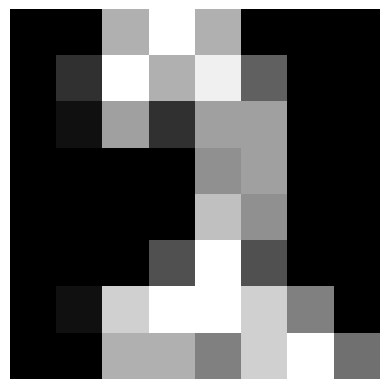

predicted_image tensor([2])


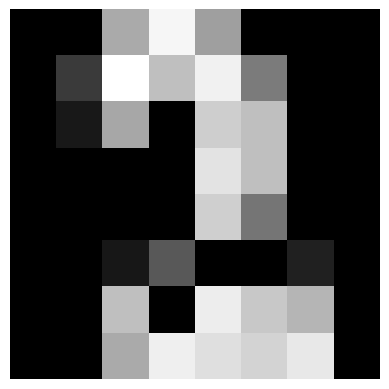

epoch 0,accuracy 0.7959697732997482, validation loss 15.763688775694341, train loss 14.22993755885533
epoch 1,accuracy 0.7959697732997482, validation loss 15.758317884930435, train loss 14.221661327907018
epoch 2,accuracy 0.7959697732997482, validation loss 15.750965461923133, train loss 14.214777597699847
epoch 3,accuracy 0.7984886649874056, validation loss 15.753036981866101, train loss 14.208787416730608
epoch 4,accuracy 0.7984886649874056, validation loss 15.746469348744121, train loss 14.200680460248675
epoch 5,accuracy 0.801007556675063, validation loss 15.759449363055097, train loss 14.196875054495676
epoch 6,accuracy 0.7959697732997482, validation loss 15.750612129192207, train loss 14.190541125706265
epoch 7,accuracy 0.8060453400503779, validation loss 15.723419227888362, train loss 14.185068244934081
epoch 8,accuracy 0.801007556675063, validation loss 15.724440521797545, train loss 14.179822425842286
epoch 9,accuracy 0.8035264483627204, validation loss 15.729101272313962, tra

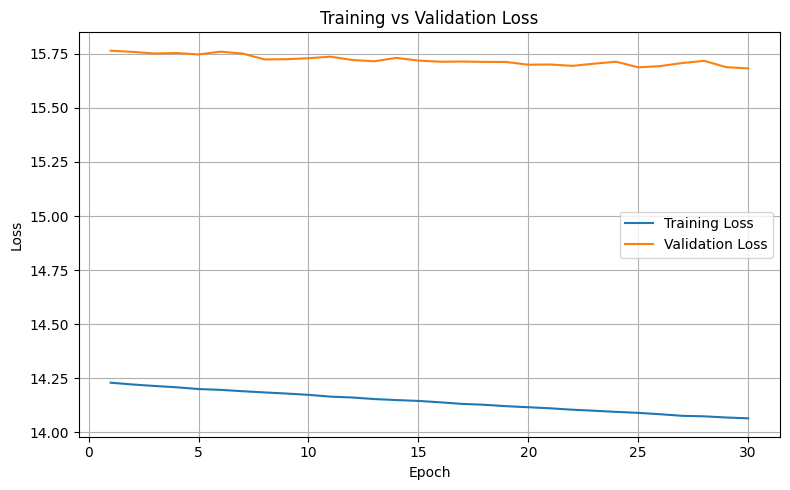

tensor([ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 13.,  7.,  7., 13.,
         0.,  0.,  0.,  1.,  7.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  1., 10.,
        16., 16., 13.,  0.,  0.,  0.,  6., 13., 16.,  2.,  0.,  0.,  0.,  0.,
         1.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,
         0.,  0.,  2., 14.,  0.,  0.,  0.,  0.])
input_image 7


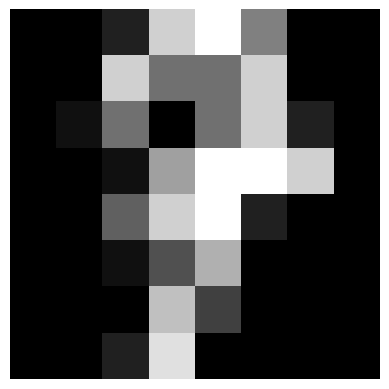

predicted_image tensor([7])


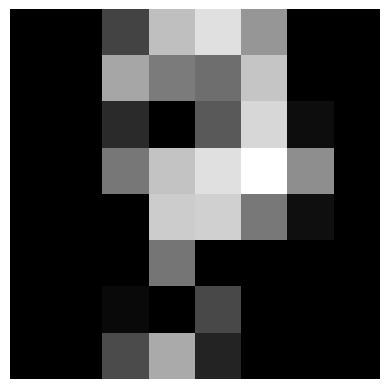

In [40]:
class simple_autoencoder(torch.nn.Module):
    def __init__(self):
        super(simple_autoencoder, self).__init__()

        self.enc_fc1 = nn.Linear(64, 256)
        self.enc_fc2 = nn.Linear(256, 64)
        self.enc_fc3 = nn.Linear(64,10)

        self.dec_fc1 = nn.Linear(10, 64)
        self.dec_fc2 = nn.Linear(64,256)
        self.dec_fc3 = nn.Linear(256,64)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def encoder(self,input):
        # print("shape 1",input.shape)
        # x = input.view(-1,64)
        # print("shape 2",x.shape)
        x = self.relu(self.enc_fc1(input))
        x = self.relu(self.enc_fc2(x))

        # print("shape 3",x.shape)
        latent = self.sigmoid(self.enc_fc3(x))
        # print("shape 5",x.shape)
        return latent

    def decoder(self, latent):
        # print("shape -1",x.shape)
        x = self.relu(self.dec_fc1(latent))
        # print("shape -3",x.shape)
        x = self.relu(self.dec_fc2(x))
        x = self.relu(self.dec_fc3(x))
        return x
        
    def forward(self, input):
        
        latent = self.encoder(input)
        # pred = self.latent_prediction(latent)
        x = self.decoder(latent)

        return x,latent

    def generate_image_from_one_hot(self,latent):
        return self.decoder(latent)

def visualise_prediction(model, batch,index = 0):
    data,label = batch
    print(data)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking for efficiency
        input = torch.tensor(np.expand_dims(data, axis=0), dtype=torch.float32)
        # input = data
        # print("input",input.shape,input)
        predicted_output,pred_label = model(input)
        pred_label = pred_label.argmax(dim=1)
        predicted_output = predicted_output.numpy()[0]
        # print("pred",predicted_output.shape,predicted_output)
        print("input_image", label)
        show_bw_image(input)

        print("predicted_image", pred_label)
        show_bw_image(predicted_output)

def generate_image_from_one_hot(model, number = None,one_hot = None):
    if number or number == 0:
            print(f"generating image for number {number}")
            one_hot = [0] * 10
            one_hot[number] = 1
    one_hot = torch.tensor(one_hot, dtype=torch.float32)
    # print("onehot",type(one_hot),one_hot.shape)
    model.eval()
    with torch.no_grad():
        predicted_output = model.generate_image_from_one_hot(one_hot)
        predicted_output = predicted_output.numpy()
        print(predicted_output.shape)
        show_bw_image(predicted_output)
        
def plot_losses(val_losses,train_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def Validate(model, val_loader):
    MSE_loss = nn.MSELoss()
    CE_loss = nn.CrossEntropyLoss()
    model.eval()
    losses = []
    correct_guesses = 0
    total_guesses = 0
    with torch.no_grad():
        for batch in val_loader:
            input,target = batch
            one_hot_target = F.one_hot(target, num_classes=10).float()
            output, latent = model(input)
            # print("latent shape",latent.shape)
            # print("latent argax", latent.argmax(axis = 1))
            
            for i, pred in enumerate(latent.argmax(axis = 1)):
                if pred == target[i]:
                    correct_guesses += 1
                total_guesses += 1
            mse_loss = MSE_loss(output, input)
            ce_loss = CE_loss(latent, one_hot_target)
            loss = mse_loss+3*ce_loss
            losses.append(loss.item())
    # print("total",total_guesses, "correct", correct_guesses)
    return np.mean(losses), (correct_guesses/total_guesses)
    
def Train(model,train_loader, val_loader, epochs,lr):
    MSE_loss = nn.MSELoss()
    CE_loss = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    gradients = []
    epoch_val_losses = []
    epoch_train_losses = []
    epoch_val_accuracies = []
    for epoch in range(epochs):
        model.train()
        losses = []
        for batch in train_loader:
            input,target = batch
            target = F.one_hot(target, num_classes=10).float()
            # print("input",input.shape)
            # print("target", target.shape)
            optimizer.zero_grad() #sets initial gradients to 0 for security purposes
        
            output, latent = model(input)
            # print("latent",latent.shape,"target",target.shape)
            mse_loss = MSE_loss(output, input)
            ce_loss = CE_loss(latent, target)
            loss = mse_loss+3*ce_loss
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
        val_loss,val_accuracy = Validate(model, val_loader)
        epoch_val_accuracies.append(val_accuracy)
        epoch_val_losses.append(val_loss)
        epoch_train_losses.append(np.mean(losses))
        # print('epoch {}, loss {}'.format(epoch, loss.item()))
        print(f'epoch {epoch},accuracy {val_accuracy}, validation loss {epoch_val_losses[-1]}, train loss {epoch_train_losses[-1]}')

    plot_losses(epoch_val_losses,epoch_train_losses)  


    
learning_rate = 0.0001
num_epochs = 30

# model = simple_autoencoder()
visualise_prediction(model,val_dataset[random.randrange(10)])
# generate_image_from_one_hot(model,number = 0)
Train(model,train_loader, val_loader, num_epochs,learning_rate)
visualise_prediction(model,val_dataset[random.randrange(10)])
# generate_image_from_one_hot(model,number = 0)


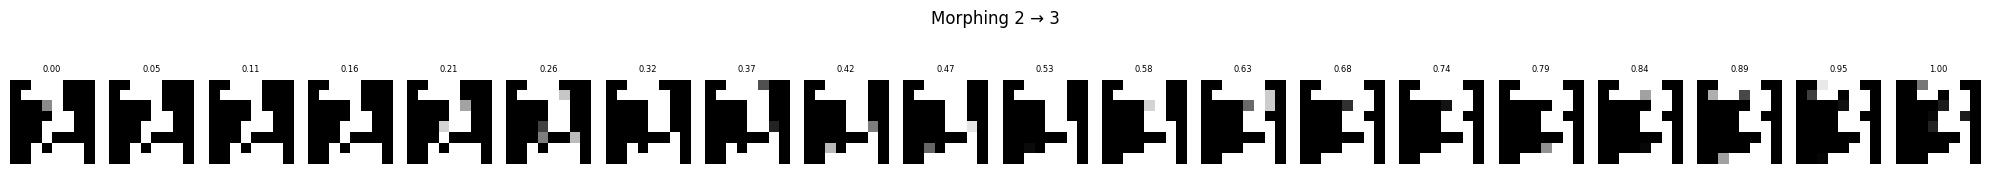

In [50]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def morph_in_grid(model, class_from, class_to, steps=20):
    # One-hot vectors
    vec_from = torch.zeros(10)
    vec_from[class_from] = 1.0

    vec_to = torch.zeros(10)
    vec_to[class_to] = 1.0

    fig, axes = plt.subplots(1, steps, figsize=(steps, 2))

    for i in range(steps):
        alpha = i / (steps - 1)
        interp = (1 - alpha) * vec_from + alpha * vec_to
        with torch.no_grad():
            output = model.decoder(interp.unsqueeze(0)).numpy().reshape(8, 8)
        axes[i].imshow(output, cmap='gray', vmin=0, vmax=1)
        axes[i].axis('off')
        axes[i].set_title(f"{alpha:.2f}", fontsize=6)

    fig.suptitle(f"Morphing {class_from} → {class_to}")
    plt.tight_layout()
    plt.show()

morph_in_grid(model, class_from=2, class_to=3)


tensor([ 0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 15., 15.,  7.,  0.,
         0.,  0.,  0.,  9., 10.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
        15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,
         1., 16.,  7.,  2.,  2.,  0.,  0.,  1., 12., 16., 15., 16., 15.,  0.,
         0.,  4., 16., 16., 16., 12., 11.,  0.])
input_image 2


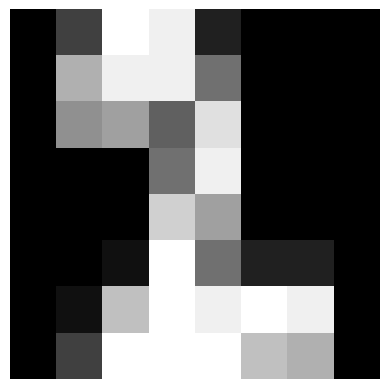

predicted_image tensor([2])


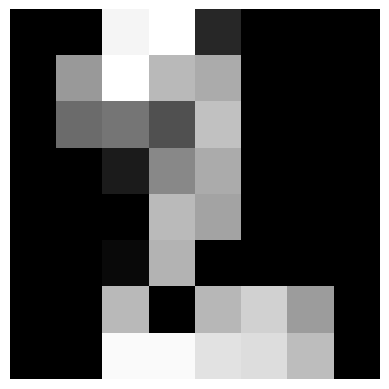

tensor([ 0.,  0.,  2., 13., 16., 16.,  7.,  0.,  0.,  0., 12., 15., 12., 16.,
        10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0.,  3.,  0.,
         4., 16.,  1.,  0.,  0.,  0.,  0., 10., 14., 16.,  6.,  0.,  0.,  0.,
         3., 16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,
         0.,  0.,  2., 15.,  6.,  0.,  0.,  0.])
input_image 7


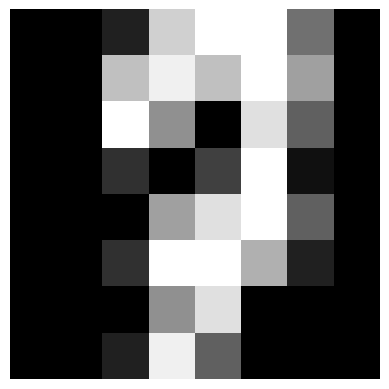

predicted_image tensor([7])


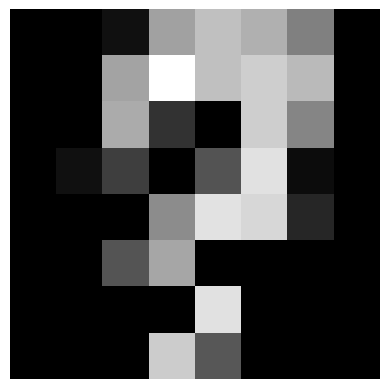

tensor([ 0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  6., 16., 16., 16.,
        16.,  0.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,  0.,  0.,  2.,  9.,
        11., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,
         0.,  0.,  4., 11.,  1.,  0.,  0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,
         0.,  0.,  0., 11.,  3.,  0.,  0.,  0.])
input_image 9


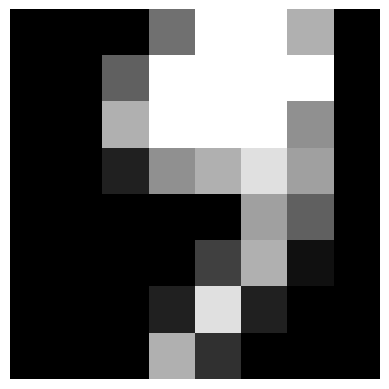

predicted_image tensor([1])


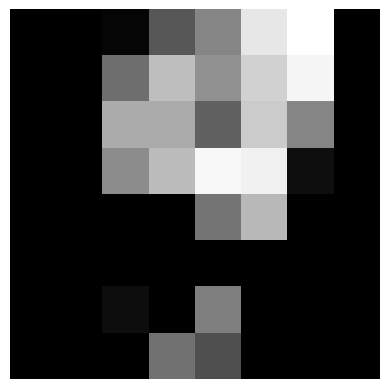

tensor([ 0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,
         0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  9., 11.,  0.,  0.,  0.])
input_image 1


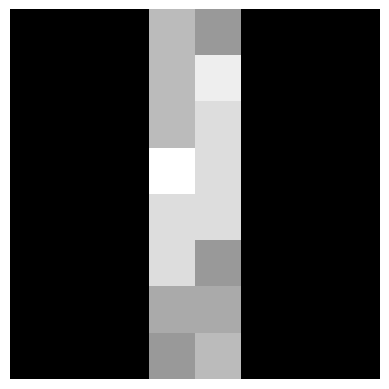

predicted_image tensor([1])


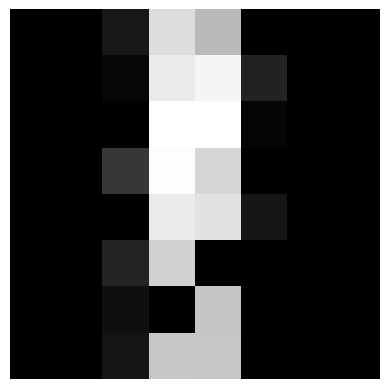

tensor([ 0.,  2., 13., 16., 12.,  0.,  0.,  0.,  0.,  9., 15., 10., 16.,  3.,
         0.,  0.,  0.,  5.,  7.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10.,
        14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
        14., 16.,  1.,  3.,  7.,  1.,  0.,  3., 16., 12., 10., 16., 11.,  1.,
         0.,  0., 13., 16., 13.,  7.,  1.,  0.])
input_image 2


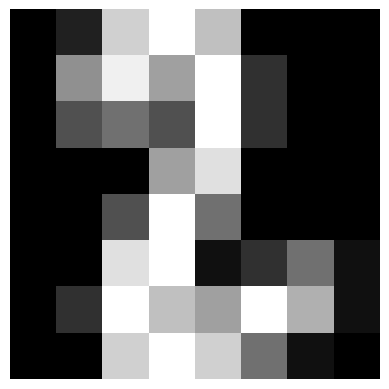

predicted_image tensor([2])


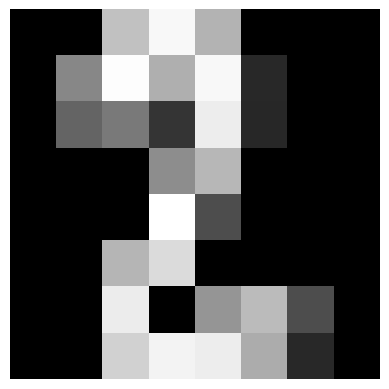

tensor([ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0., 10., 16., 12., 14.,
         1.,  0.,  0.,  1., 14., 12.,  0., 13.,  3.,  0.,  0.,  5., 16.,  6.,
         0.,  8.,  6.,  0.,  0.,  8., 16.,  0.,  0.,  9.,  8.,  0.,  0.,  7.,
        16.,  3.,  7., 16.,  5.,  0.,  0.,  3., 15., 13., 16., 15.,  2.,  0.,
         0.,  0.,  4., 15., 12.,  2.,  0.,  0.])
input_image 0


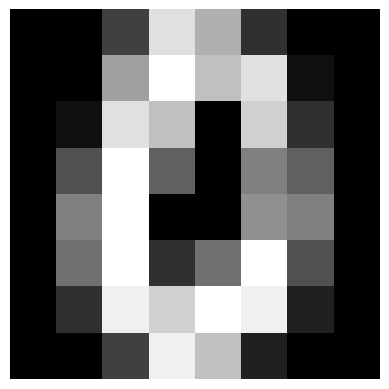

predicted_image tensor([0])


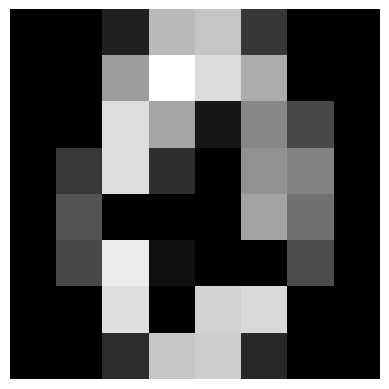

tensor([ 0.,  0.,  8., 12., 11.,  6.,  0.,  0.,  0.,  0.,  8., 16., 16., 13.,
         2.,  0.,  0.,  2., 14., 16., 16., 14.,  2.,  0.,  0.,  2., 13., 16.,
        16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,  0.,  0.,  4.,
        16., 16., 16., 10.,  0.,  0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  4., 11., 12.,  7.,  0.,  0.])
input_image 1


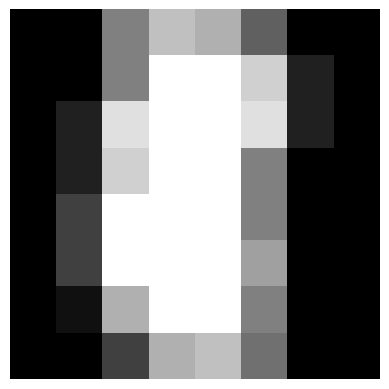

predicted_image tensor([8])


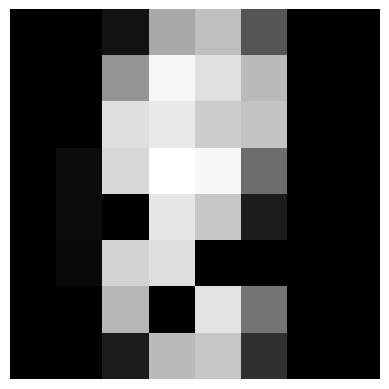

tensor([ 0.,  0.,  5., 14., 14.,  2.,  0.,  0.,  0.,  2., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  7.,  4., 16., 12.,  0.,  0.,  0.,  0.,  1.,  9.,
        16., 16.,  8.,  0.,  0.,  3., 15., 16., 16., 10.,  2.,  0.,  0.,  4.,
        16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,
         0.,  0.,  9., 13.,  0.,  0.,  0.,  0.])
input_image 7


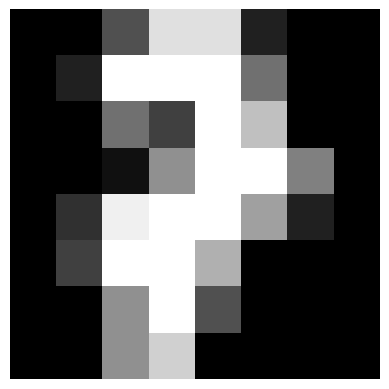

predicted_image tensor([7])


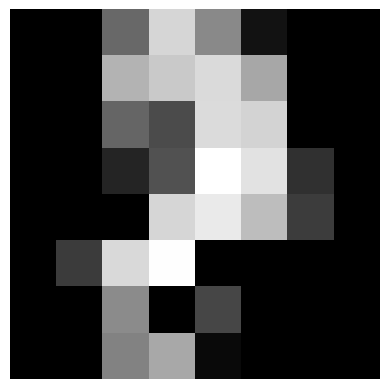

tensor([ 0.,  0.,  8., 16., 11.,  0.,  0.,  0.,  0.,  2., 15.,  8., 16.,  7.,
         0.,  0.,  0.,  3., 13.,  1., 14., 13.,  0.,  0.,  0.,  0., 10., 16.,
        16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  5., 15.,  4.,  0.,  0.,  0.,
         0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  5.,  6.,  5., 15.,  4.,  0.,
         0.,  0.,  6., 15., 16., 12.,  1.,  0.])
input_image 9


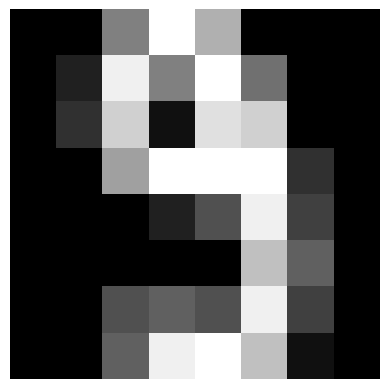

predicted_image tensor([9])


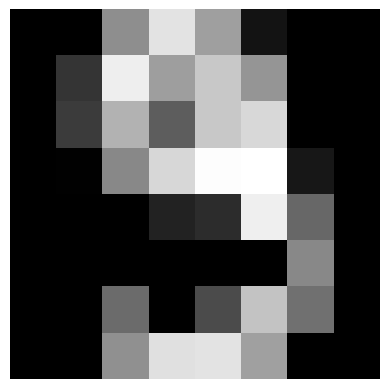

tensor([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,  1.,
         0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,  5., 16.,
        16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,  0.,  0.,  4.,
        16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,  8., 16.,  8.,  0.,
         0.,  1.,  8., 12., 14., 12.,  1.,  0.])
input_image 8


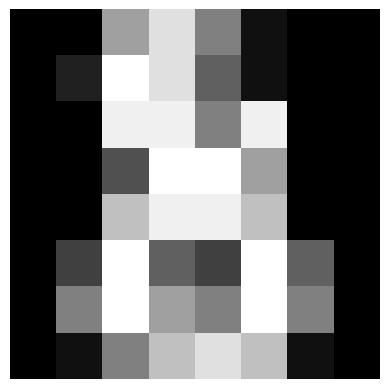

predicted_image tensor([8])


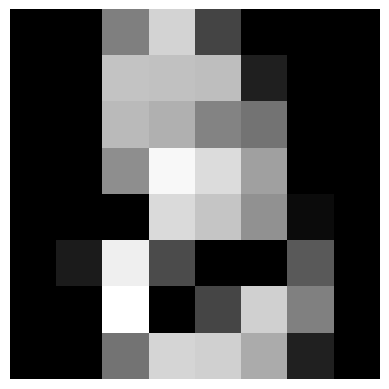

In [51]:
import random

indices = random.sample(range(len(val_dataset)), 10)
for i in indices:
    # print(i)
    # print(val_dataset[i])
    visualise_prediction(model, val_dataset[i])